# MediaPipe Handler

In [1]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from IPython.display import display, clear_output
import PIL.Image
import time
import cv2

In [2]:
model_path = 'pose_landmarker_full.task'

### MediaPipe Visualization Utilities

In [3]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np


def draw_landmarks_on_image(rgb_image, detection_result):
    pose_landmarks_list = detection_result.pose_landmarks
    annotated_image = np.copy(rgb_image)

    # Loop through the detected poses to visualize.
    for idx in range(len(pose_landmarks_list)):
        pose_landmarks = pose_landmarks_list[idx]

        # Draw the pose landmarks.
        pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
        pose_landmarks_proto.landmark.extend([
            landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
        ])
        solutions.drawing_utils.draw_landmarks(
            annotated_image,
            pose_landmarks_proto,
            solutions.pose.POSE_CONNECTIONS,
        solutions.drawing_styles.get_default_pose_landmarks_style())
    return annotated_image

### Prepare data

In [4]:
BaseOptions = mp.tasks.BaseOptions
PoseLandmarker = vision.PoseLandmarker
PoseLandmarkerOptions = vision.PoseLandmarkerOptions
VisionRunningMode = vision.RunningMode


options = PoseLandmarkerOptions(
    base_options=BaseOptions(model_asset_path=model_path),
    running_mode=VisionRunningMode.VIDEO
)



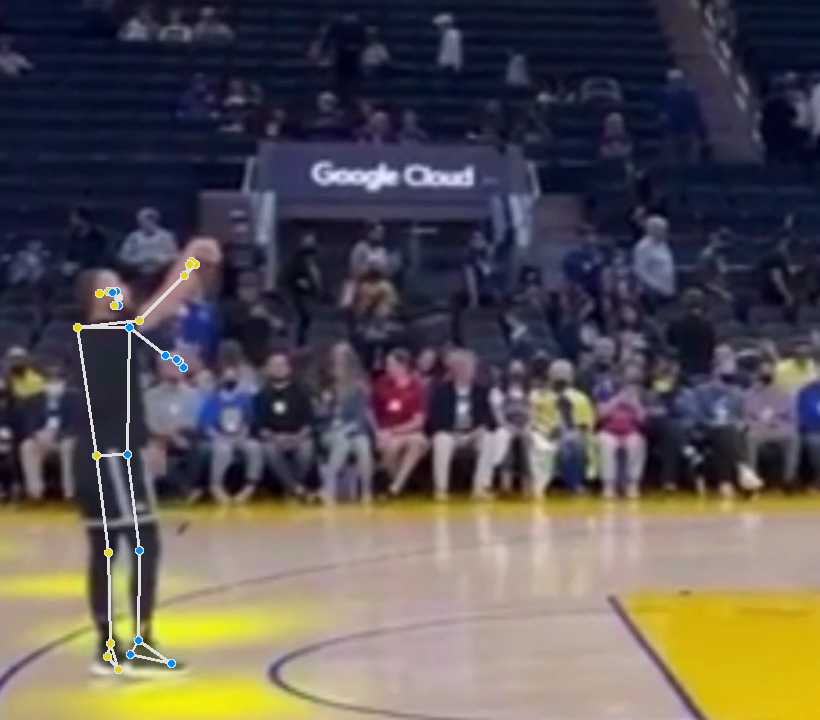

In [5]:
with PoseLandmarker.create_from_options(options) as landmarker:
    cap = cv2.VideoCapture("Curry Shooting.mp4")
    fps = cap.get(cv2.CAP_PROP_FPS)

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret: break

        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=rgb_frame)
        
        timestamp_ms = cap.get(cv2.CAP_PROP_POS_MSEC)
        timestamp = int(timestamp_ms * 1000)
        
        pose_landmarker_result = landmarker.detect_for_video(mp_image, timestamp)
        annotated_image = draw_landmarks_on_image(mp_image.numpy_view(), pose_landmarker_result)
        
        
        pil_img = PIL.Image.fromarray(annotated_image)
        display(pil_img)
        clear_output(wait=True)
        
        
    cap.release()